In [ ]:
## load necessary libraries
%matplotlib inline
#%ma3tplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button, RadioButtons
import os,time,subprocess,glob
from PIL import Image
import cripser as cr
import tcripser as tcr
import persim
import skimage
from skimage import io
from skimage.transform import rotate
from skimage.data import cells3d
from skimage.filters import threshold_otsu
from scipy.ndimage import distance_transform_edt,convolve
import os, re
from tkinter import filedialog
import tkinter as tk


In [ ]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

# for infile in sorted(glob.glob('*/content/drive/MyDrive/Project Phase 2/png'), key=numericalSort):
#     print ("Current File Being Processed is: " + infile)

In [ ]:
def dt(img,radius=15,signed=False):
#    bw_img = (img >= rank.otsu(img, disk(radius)))
    bw_img = (img >= threshold_otsu(img))
    dt_img = distance_transform_edt(bw_img)
    if signed:
        dt_img -= distance_transform_edt(~bw_img)
    return(dt_img)

def explore_slices(data, cmap="gray"):
    from ipywidgets import interact
    N = data.shape[-1]
    @interact(plane=(0, N - 1))
    def display_slice(plane=N//2):
        fig, ax = plt.subplots(figsize=(20, 5))
        plt.imshow(data[:,:,plane],cmap=cmap)
        plt.show()
    return display_slice


In [ ]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts
def dt(img,radius=15,signed=False):
#    bw_img = (img >= rank.otsu(img, disk(radius)))
    bw_img = (img >= threshold_otsu(img))
    dt_img = distance_transform_edt(bw_img)
    if signed:
        dt_img -= distance_transform_edt(~bw_img)
    return(dt_img)

def explore_slices(data, cmap="gray"):
    #from ipywidgets import interact
    N = data.shape[-1]
    #@interact(plane=(0, N - 1))
    def display_slice(plane=N//2):
        fig, ax = plt.subplots(figsize=(20, 5))
        plt.imshow(data[:,:,plane],cmap=cmap)
        plt.show()
    return display_slice
if __name__ == "__main__":
    # Provide the path to the input DICOM folder and the output PNG folder
    input_folder = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\Training image 20\\Normal cases"
    output_folder_path = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\VS code\\Persistence diagram\\Normal"

    for imgfile in sorted(os.listdir(input_folder), key=numericalSort):
    #for imgfile in os.listdir(input_folder):
        #imgfile = '/content/drive/MyDrive/project/png/1-001.png'
        # load image data
        #print(imgfile)
        imgfile = os.path.join(input_folder, imgfile)
        if os.path.isfile(imgfile):
            #print(imgfile)
            img2d = np.array(Image.open(imgfile))
        else: # if file is not found, load the demo img from skimage
            img2d = skimage.data.camera()
            io.imsave(imgfile, img2d)

        # apply distance transform
        img2d_dt = dt(img2d)

        fig,axs = plt.subplots(1,2)
        axs[0].imshow(img2d)
        axs[1].imshow(img2d_dt)
        fig.savefig(os.path.join(output_folder_path, f"{os.path.splitext(imgfile)[0]}_images.png"))
        print(img2d.shape, img2d.dtype, f"{np.min(img2d)}--{np.max(img2d)}")
        plt.show()
        #print(f"Conversion completed for {imgfile}")
        start = time.time()
        pd = cr.computePH(img2d)
        pds = [pd[pd[:,0] == i] for i in range(3)]
        print("Betti numbers: ",[len(pds[i]) for i in range(len(pds))])

        # compute PH for the T-construction of the original image (pixel value filtration)
        pdt = tcr.computePH(img2d)
        pdst = [pdt[pdt[:,0] == i] for i in range(3)]
        print("Betti numbers: ",[len(pdst[i]) for i in range(len(pdst))])

        print ("elapsed_time:{} sec".format(time.time() - start))
       # print(pds)
        ## plot persistent diagram using persim
        fig,axs = plt.subplots(1,2)
        persim.plot_diagrams([p[:,1:3] for p in pds], ax=axs[0], title='V-construction')
        persim.plot_diagrams([p[:,1:3] for p in pdst], ax=axs[1], title='T-construction')
        fig.savefig(os.path.join(output_folder_path, f"{os.path.splitext(imgfile)[0]}_diagrams.png"))

    print(f"All conversions completed")

In [ ]:
import os
import numpy as np
from PIL import Image
import skimage.data
import skimage.io as io
import matplotlib.pyplot as plt
import persim  # Assuming persim is imported
import time

def numericalSort(value):
    import re
    numbers = re.compile(r'(\d+)')
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

def dt(img):
    # Placeholder for the distance transform function
    from scipy.ndimage import distance_transform_edt
    return distance_transform_edt(img)

if __name__ == "__main__":
   
    # Provide the path to the input DICOM folder and the output PNG folder
    input_folder = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\Training image 20\\Normal cases"
    output_folder_path = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\VS code\\Persistence diagram\\Normal\\"
    os.makedirs(output_folder_path, exist_ok=True)

    for imgfile in sorted(os.listdir(input_folder), key=numericalSort):
        imgfile_path = os.path.join(input_folder, imgfile)
        if os.path.isfile(imgfile_path):
            img2d = np.array(Image.open(imgfile_path))
        else:  # if file is not found, load the demo img from skimage
            img2d = skimage.data.camera()
            io.imsave(imgfile_path, img2d)

        # Apply distance transform
        img2d_dt = dt(img2d)

        # Plot and save original and distance transformed images
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(img2d, cmap='gray')
        axs[1].imshow(img2d_dt, cmap='gray')
        images_save_path = os.path.join(output_folder_path, f"{os.path.splitext(os.path.basename(imgfile))[0]}_images.png")
        fig.savefig(images_save_path)
        plt.close(fig)
        print(f"Saved image plot to {images_save_path}")
        print(img2d.shape, img2d.dtype, f"{np.min(img2d)}--{np.max(img2d)}")

        # Start timing
        start = time.time()

        # Compute persistent homology for the original image
        pd = cr.computePH(img2d)
        pds = [pd[pd[:, 0] == i] for i in range(3)]
        print("Betti numbers: ", [len(pds[i]) for i in range(len(pds))])

        # Compute persistent homology for the T-construction of the original image
        pdt = tcr.computePH(img2d)
        pdst = [pdt[pdt[:, 0] == i] for i in range(3)]
        print("Betti numbers: ", [len(pdst[i]) for i in range(len(pdst))])

        print("elapsed_time:{} sec".format(time.time() - start))

        # Plot and save persistent diagrams
        fig, axs = plt.subplots(1, 2)
        persim.plot_diagrams([p[:, 1:3] for p in pds], ax=axs[0], title='V-construction')
        persim.plot_diagrams([p[:, 1:3] for p in pdst], ax=axs[1], title='T-construction')
        diagrams_save_path = os.path.join(output_folder_path, f"{os.path.splitext(os.path.basename(imgfile))[0]}_diagrams.png")
        fig.savefig(diagrams_save_path)
        plt.close(fig)
        print(f"Saved persistence diagrams to {diagrams_save_path}")

    print("All conversions completed")


In [ ]:

if __name__ == "__main__":
    # Provide the path to the input DICOM folder and the output PNG folder
    input_folder = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\Training image 20\\Bengin cases"

    for imgfile in sorted(os.listdir(input_folder), key=numericalSort):
    #for imgfile in os.listdir(input_folder):
        #imgfile = '/content/drive/MyDrive/project/png/1-001.png'
        # load image data
        #print(imgfile)
        imgfile = os.path.join(input_folder, imgfile)
        if os.path.isfile(imgfile):
            #print(imgfile)
            img2d = np.array(Image.open(imgfile))
        else: # if file is not found, load the demo img from skimage
            img2d = skimage.data.camera()
            io.imsave(imgfile, img2d)

        # apply distance transform
        img2d_dt = dt(img2d)

        fig,axs = plt.subplots(1,2)
        axs[0].imshow(img2d)
        axs[1].imshow(img2d_dt)
        print(img2d.shape, img2d.dtype, f"{np.min(img2d)}--{np.max(img2d)}")
        plt.show()
        #print(f"Conversion completed for {imgfile}")
        start = time.time()
        pd = cr.computePH(img2d)
        pds = [pd[pd[:,0] == i] for i in range(3)]
        print("Betti numbers: ",[len(pds[i]) for i in range(len(pds))])

        # compute PH for the T-construction of the original image (pixel value filtration)
        pdt = tcr.computePH(img2d)
        pdst = [pdt[pdt[:,0] == i] for i in range(3)]
        print("Betti numbers: ",[len(pdst[i]) for i in range(len(pdst))])

        print ("elapsed_time:{} sec".format(time.time() - start))
       # print(pds)
        ## plot persistent diagram using persim
        fig,axs = plt.subplots(1,2)
        persim.plot_diagrams([p[:,1:3] for p in pds], ax=axs[0], title='V-construction')
        persim.plot_diagrams([p[:,1:3] for p in pdst], ax=axs[1], title='T-construction')

    print(f"All conversions completed")

In [ ]:

if __name__ == "__main__":
    # Provide the path to the input DICOM folder and the output PNG folder
    input_folder = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\Training image 20\\Malignant cases"

    for imgfile in sorted(os.listdir(input_folder), key=numericalSort):
    #for imgfile in os.listdir(input_folder):
        #imgfile = '/content/drive/MyDrive/project/png/1-001.png'
        # load image data
        #print(imgfile)
        imgfile = os.path.join(input_folder, imgfile)
        if os.path.isfile(imgfile):
            #print(imgfile)
            img2d = np.array(Image.open(imgfile))
        else: # if file is not found, load the demo img from skimage
            img2d = skimage.data.camera()
            io.imsave(imgfile, img2d)

        # apply distance transform
        img2d_dt = dt(img2d)

        fig,axs = plt.subplots(1,2)
        axs[0].imshow(img2d)
        axs[1].imshow(img2d_dt)
        print(img2d.shape, img2d.dtype, f"{np.min(img2d)}--{np.max(img2d)}")
        plt.show()
        #print(f"Conversion completed for {imgfile}")
        start = time.time()
        pd = cr.computePH(img2d)
        pds = [pd[pd[:,0] == i] for i in range(3)]
        print("Betti numbers: ",[len(pds[i]) for i in range(len(pds))])

        # compute PH for the T-construction of the original image (pixel value filtration)
        pdt = tcr.computePH(img2d)
        pdst = [pdt[pdt[:,0] == i] for i in range(3)]
        print("Betti numbers: ",[len(pdst[i]) for i in range(len(pdst))])

        print ("elapsed_time:{} sec".format(time.time() - start))
       # print(pds)
        ## plot persistent diagram using persim
        fig,axs = plt.subplots(1,2)
        persim.plot_diagrams([p[:,1:3] for p in pds], ax=axs[0], title='V-construction')
        persim.plot_diagrams([p[:,1:3] for p in pdst], ax=axs[1], title='T-construction')

    print(f"All conversions completed")

C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) uint8 37--255


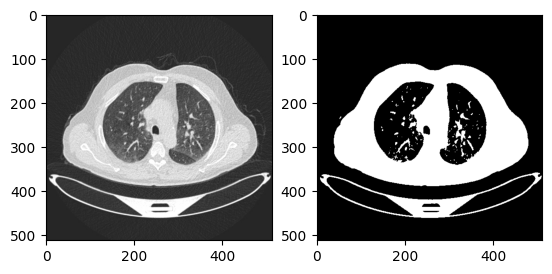

Betti numbers:  [18557, 11989, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [12551, 18125, 0]
elapsed_time:4.340420961380005 sec
(480, 640, 4) uint8 0--255


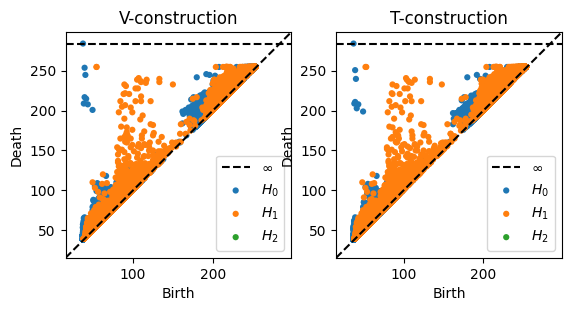

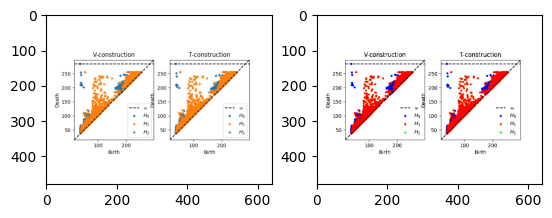

Betti numbers:  [985, 289, 0]
Betti numbers:  [638, 235, 0]
elapsed_time:5.220686912536621 sec


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(480, 640, 4) uint8 0--255


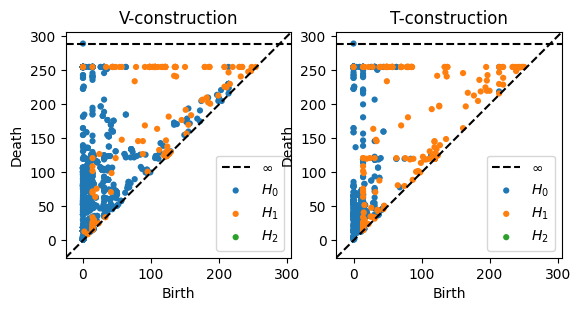

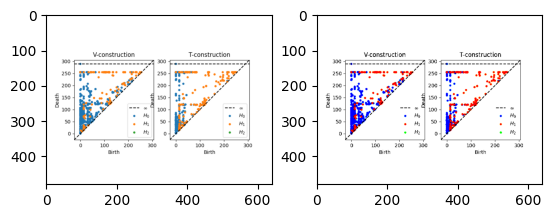

Betti numbers:  [1233, 336, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [806, 293, 2]
elapsed_time:5.040773391723633 sec
(480, 640, 4) uint8 0--255


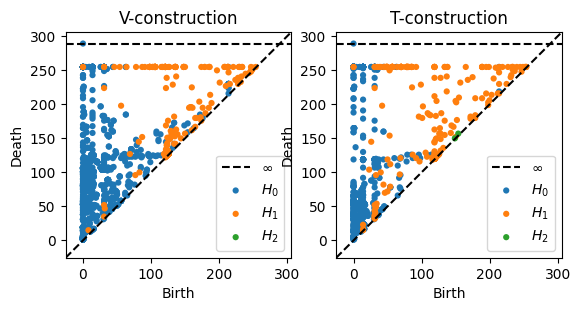

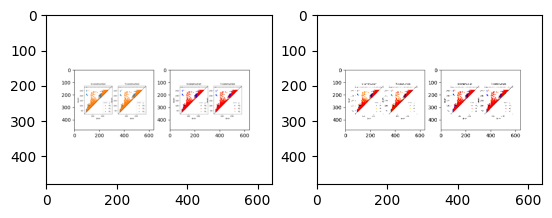

Betti numbers:  [1367, 272, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [957, 332, 0]
elapsed_time:5.061926603317261 sec
(480, 640, 4) uint8 0--255


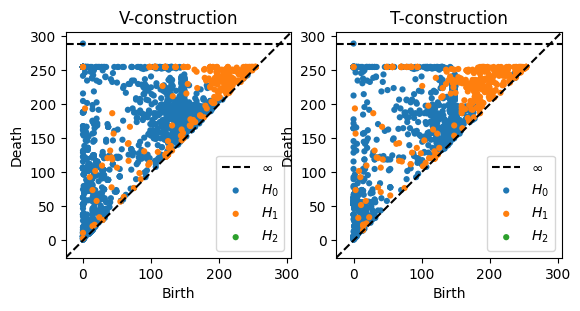

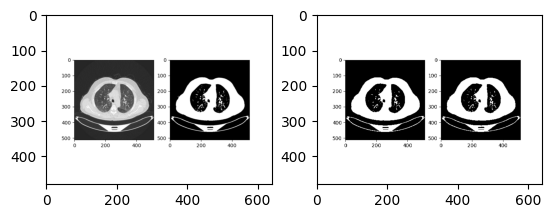

Betti numbers:  [5374, 3296, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [3282, 5320, 0]
elapsed_time:5.074523210525513 sec
(480, 640, 4) uint8 0--255


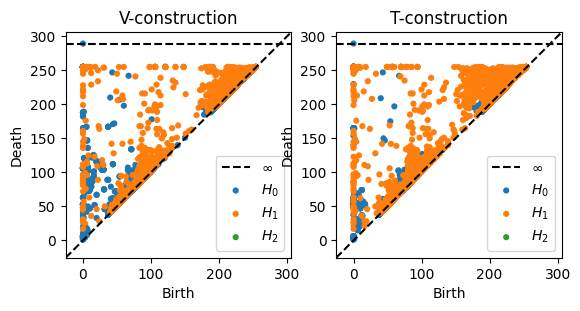

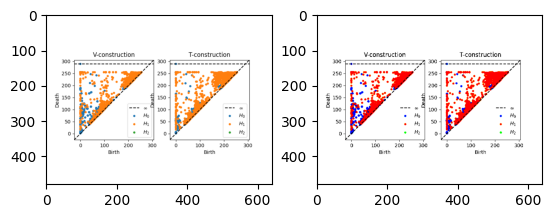

Betti numbers:  [1188, 342, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [807, 291, 0]
elapsed_time:5.174870252609253 sec
(480, 640, 4) uint8 0--255


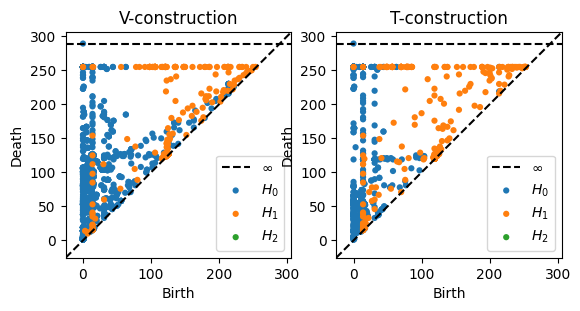

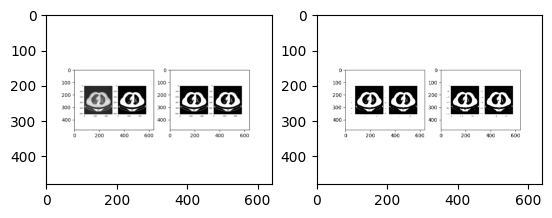

Betti numbers:  [1099, 496, 0]
Betti numbers:  [660, 769, 0]
elapsed_time:4.9595911502838135 sec


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) uint8 37--255


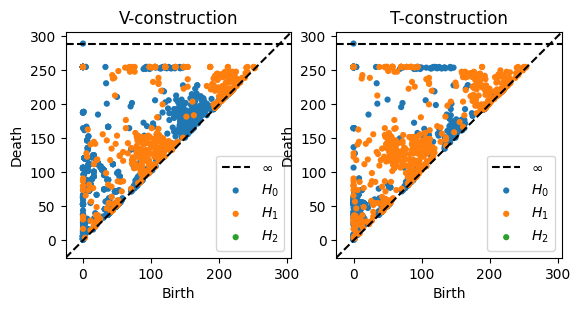

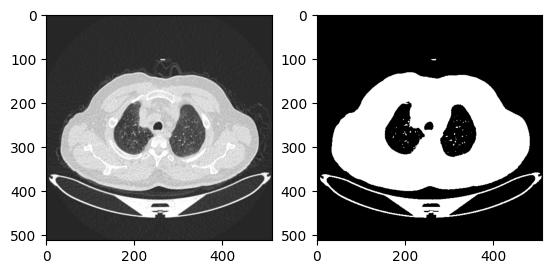

Betti numbers:  [18846, 12034, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [12633, 18330, 0]
elapsed_time:3.9427411556243896 sec
(480, 640, 4) uint8 0--255


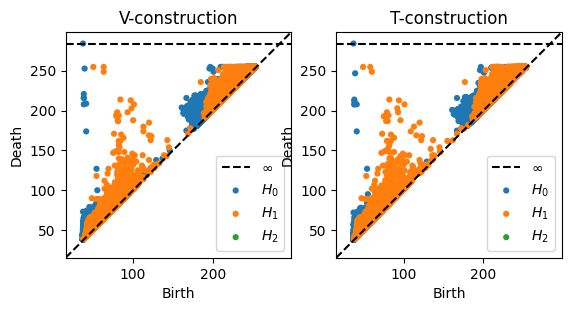

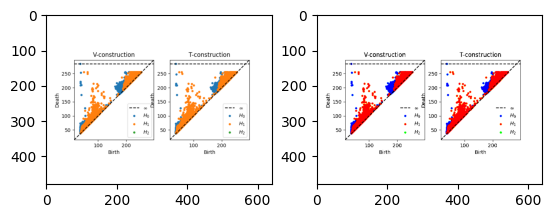

Betti numbers:  [937, 198, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [602, 180, 0]
elapsed_time:5.015561819076538 sec
(480, 640, 4) uint8 0--255


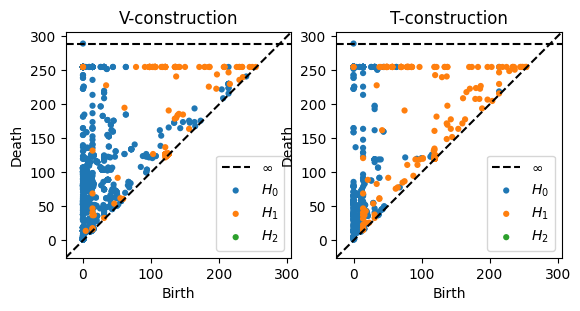

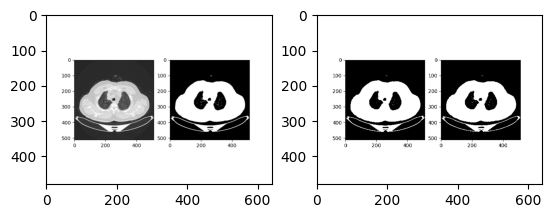

Betti numbers:  [5285, 3258, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [3242, 5267, 0]
elapsed_time:5.259284019470215 sec
(512, 512, 3) uint8 37--255


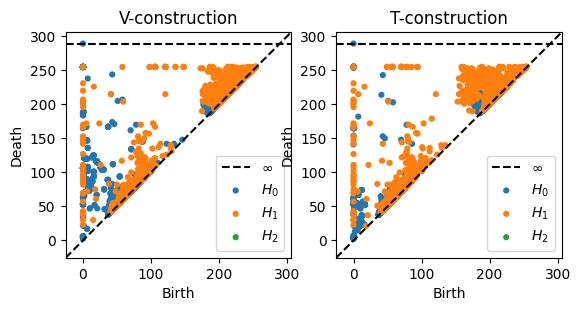

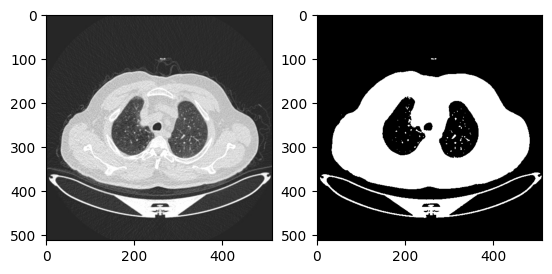

Betti numbers:  [18764, 11821, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [12323, 18112, 0]
elapsed_time:4.0515992641448975 sec
(480, 640, 4) uint8 0--255


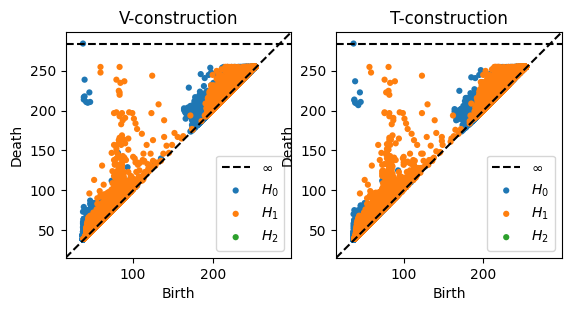

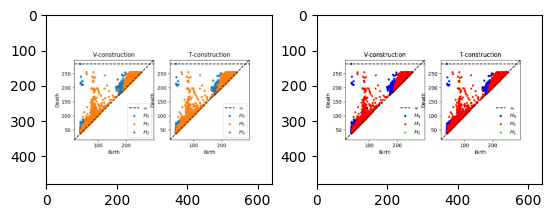

Betti numbers:  [941, 213, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [611, 211, 0]
elapsed_time:4.968520641326904 sec
(480, 640, 4) uint8 0--255


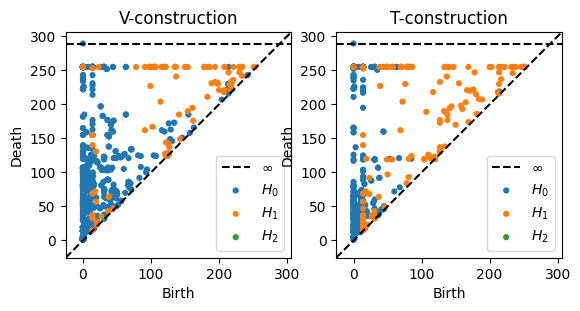

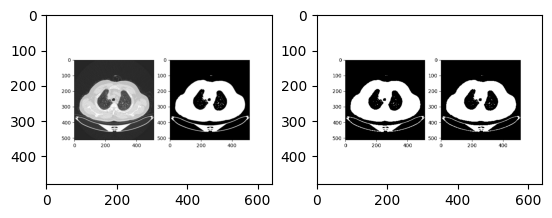

Betti numbers:  [5559, 3297, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [3301, 5483, 0]
elapsed_time:5.091826677322388 sec
(512, 512, 3) uint8 37--255


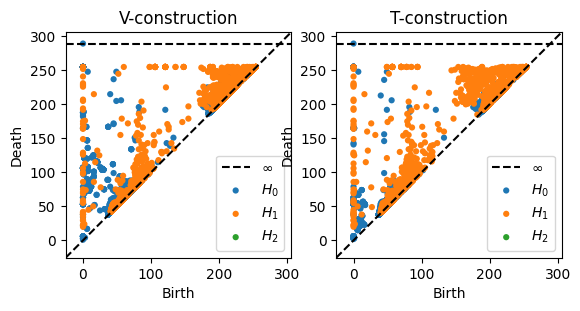

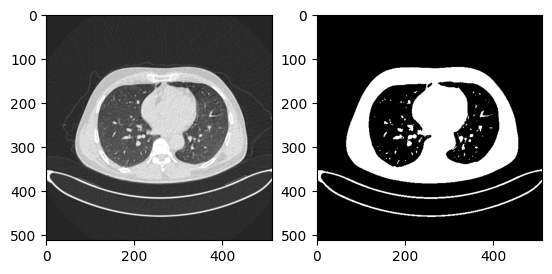

Betti numbers:  [17729, 11852, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [12350, 17212, 0]
elapsed_time:4.066051721572876 sec
(480, 640, 4) uint8 0--255


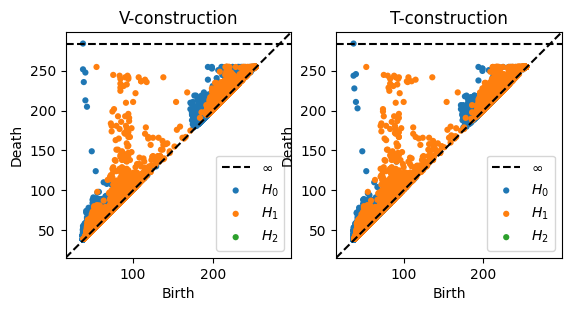

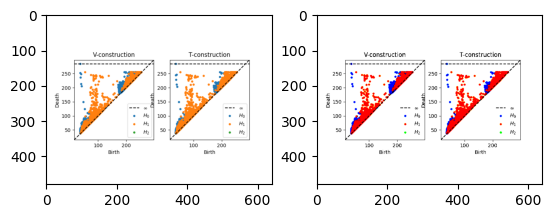

Betti numbers:  [957, 270, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [624, 254, 0]
elapsed_time:4.940601110458374 sec
(480, 640, 4) uint8 0--255


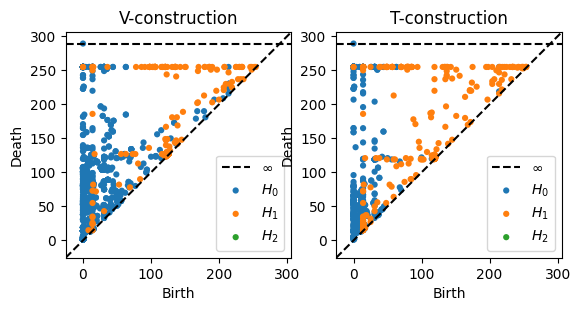

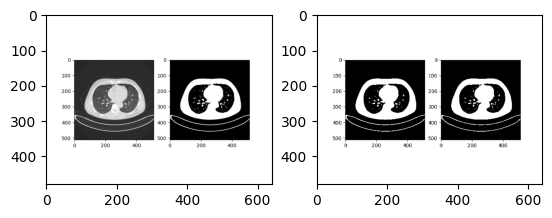

Betti numbers:  [5526, 3563, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [3498, 5529, 0]
elapsed_time:5.210854768753052 sec
(512, 512, 3) uint8 37--255


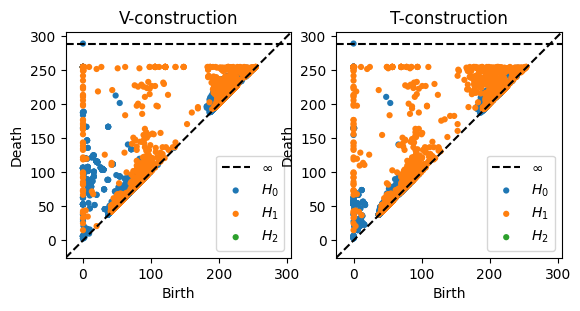

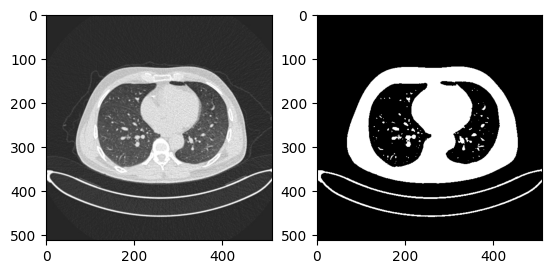

Betti numbers:  [17773, 11800, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [12336, 17096, 0]
elapsed_time:3.993253707885742 sec
(480, 640, 4) uint8 0--255


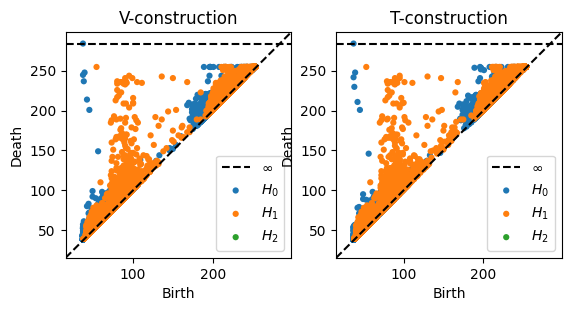

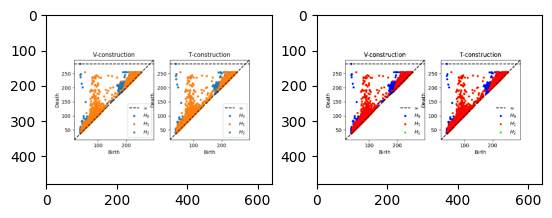

Betti numbers:  [960, 227, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [628, 222, 0]
elapsed_time:5.184850215911865 sec
(480, 640, 4) uint8 0--255


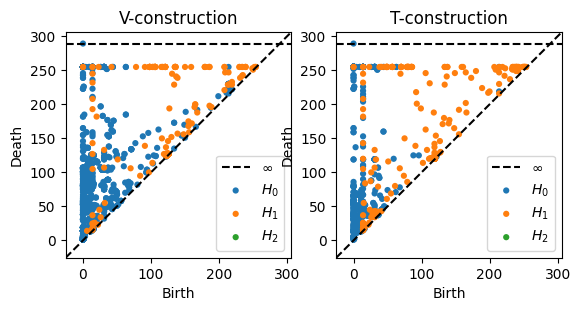

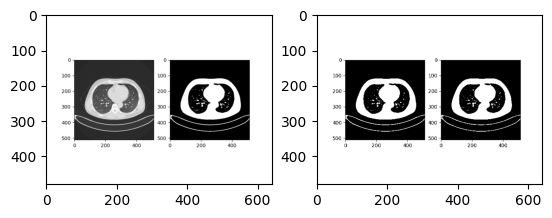

Betti numbers:  [5546, 3555, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [3393, 5579, 0]
elapsed_time:5.2025439739227295 sec
(512, 512, 3) uint8 37--255


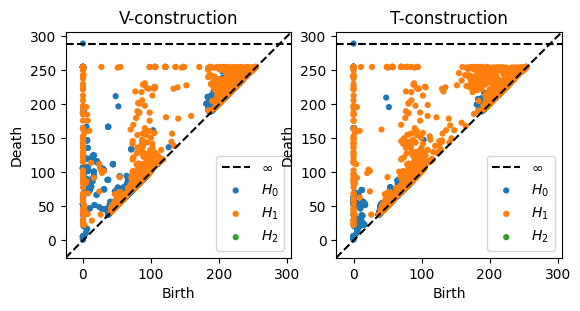

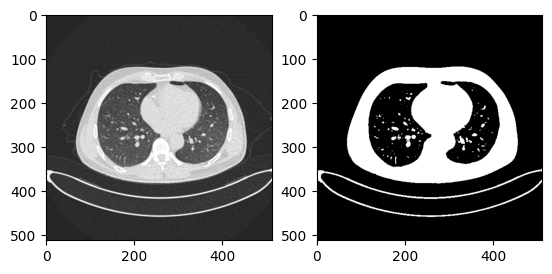

Betti numbers:  [17733, 11966, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [12416, 17124, 0]
elapsed_time:4.168230056762695 sec
(480, 640, 4) uint8 0--255


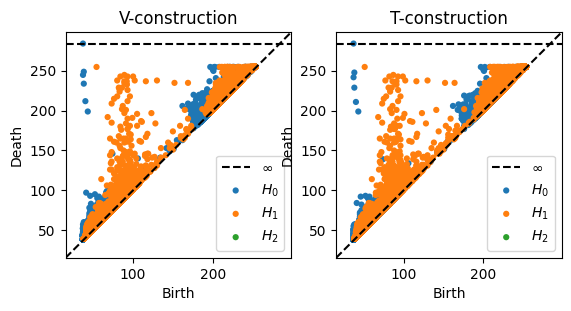

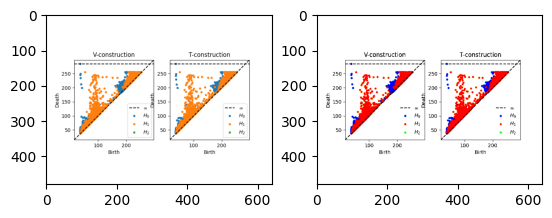

Betti numbers:  [956, 271, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [624, 257, 0]
elapsed_time:5.072980642318726 sec
(480, 640, 4) uint8 0--255


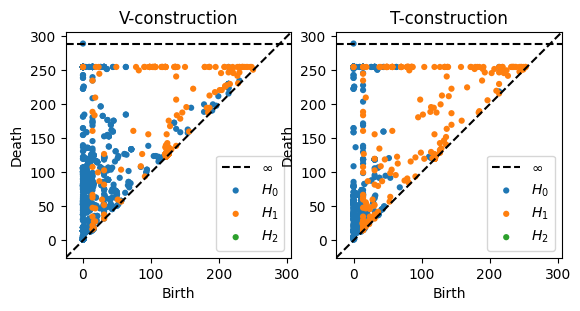

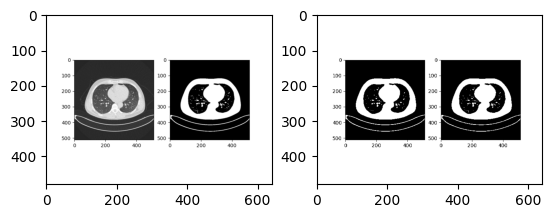

Betti numbers:  [5579, 3532, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [3556, 5594, 0]
elapsed_time:5.176416397094727 sec
(512, 512, 3) uint8 37--255


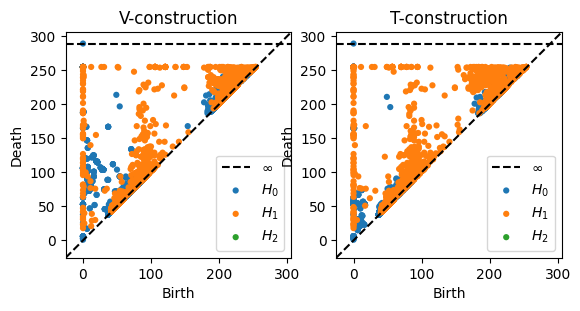

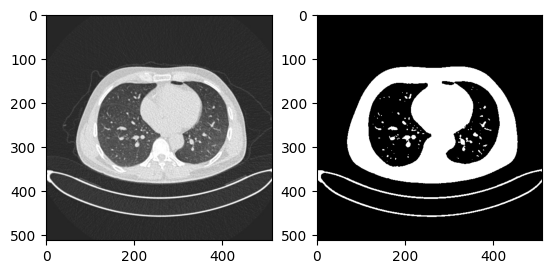

Betti numbers:  [17624, 11774, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [12320, 16989, 0]
elapsed_time:3.876812696456909 sec
(480, 640, 4) uint8 0--255


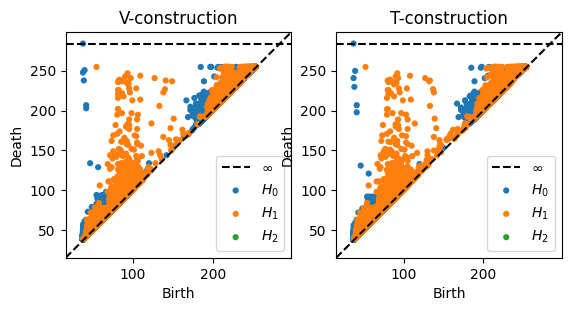

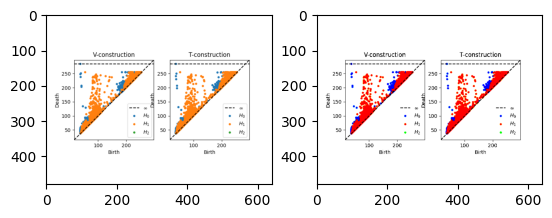

Betti numbers:  [981, 232, 0]


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 640, 4) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Betti numbers:  [638, 219, 0]
elapsed_time:4.860588788986206 sec
(480, 640, 4) uint8 0--255


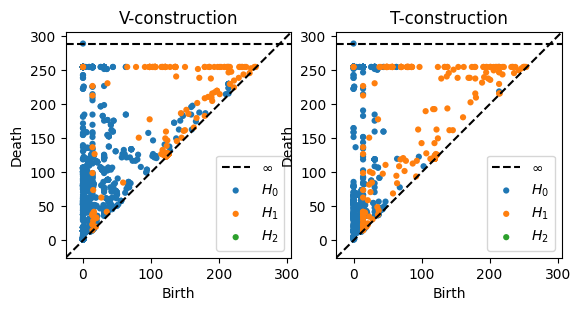

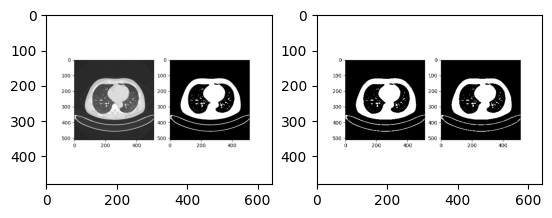

Betti numbers:  [5570, 3576, 0]
Betti numbers:  [3497, 5646, 0]
elapsed_time:7.102597713470459 sec


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) uint8 37--255


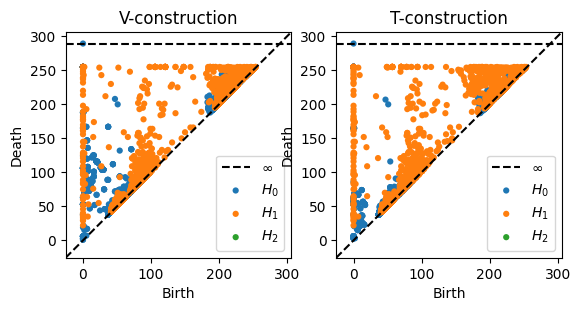

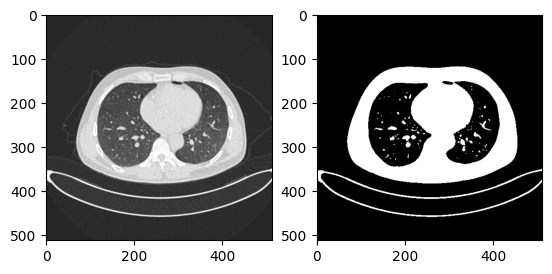

Betti numbers:  [17793, 11846, 0]
Betti numbers:  [12403, 17158, 0]
elapsed_time:5.640612840652466 sec
(512, 512) uint8 0--255


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]


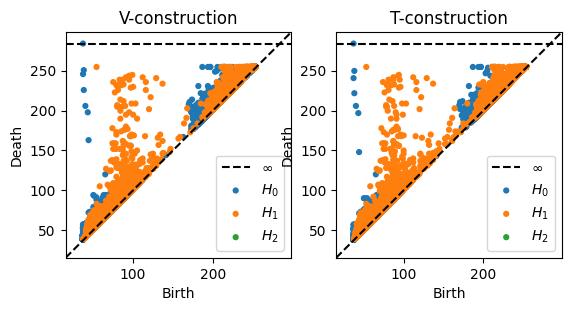

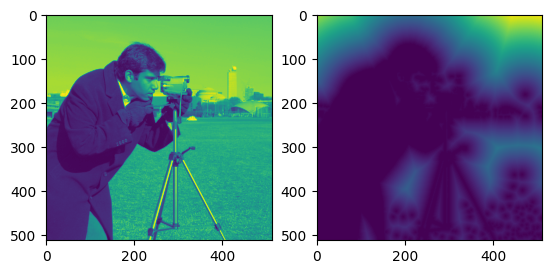

Betti numbers:  [22963, 13716, 0]
Betti numbers:  [13563, 23286, 0]
elapsed_time:0.6875758171081543 sec
(512, 512) uint8 0--255


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]


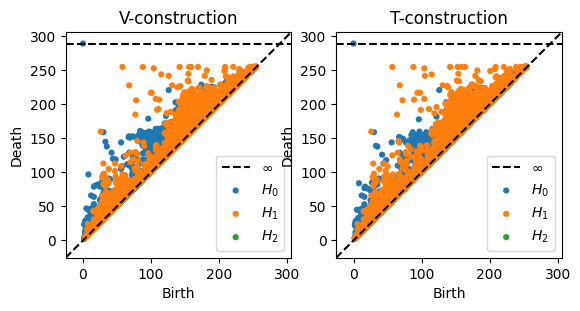

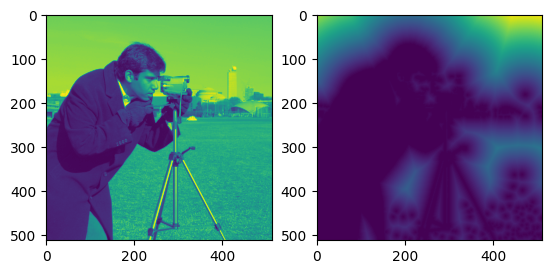

Betti numbers:  [22963, 13716, 0]
Betti numbers:  [13563, 23286, 0]
elapsed_time:0.5468957424163818 sec


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) uint8 37--255


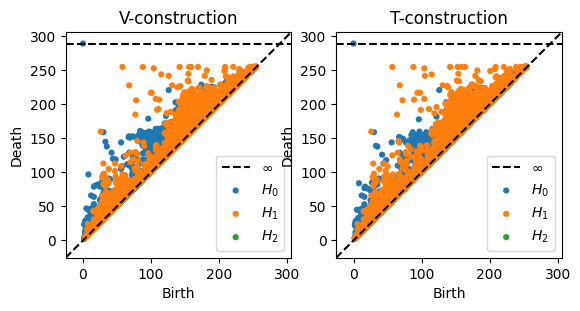

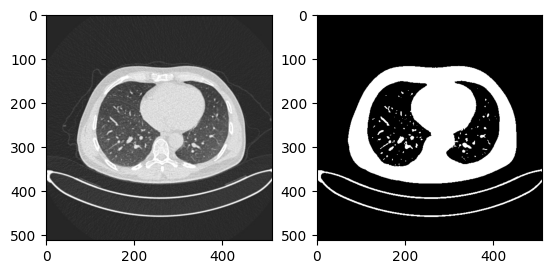

Betti numbers:  [17609, 11585, 0]
Betti numbers:  [12074, 17073, 0]
elapsed_time:5.656141757965088 sec
(512, 512) uint8 0--255


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]


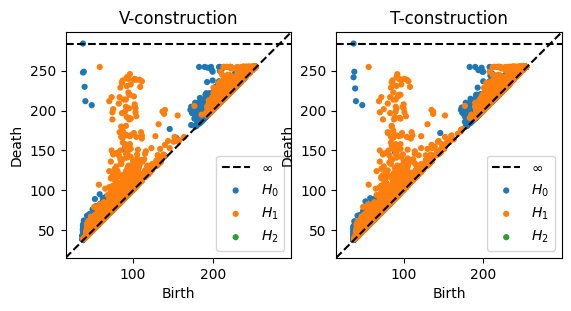

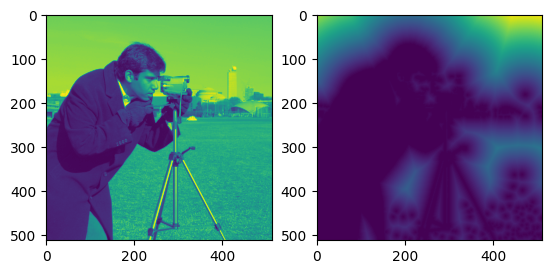

Betti numbers:  [22963, 13716, 0]
Betti numbers:  [13563, 23286, 0]
elapsed_time:0.734278678894043 sec
(512, 512) uint8 0--255


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]


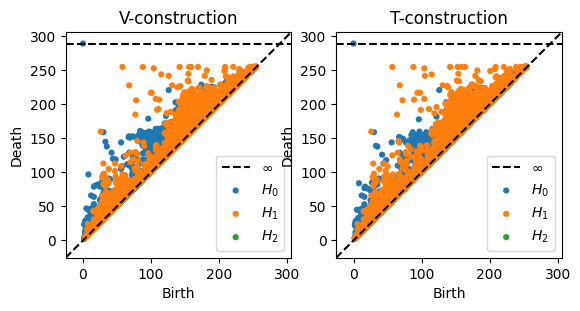

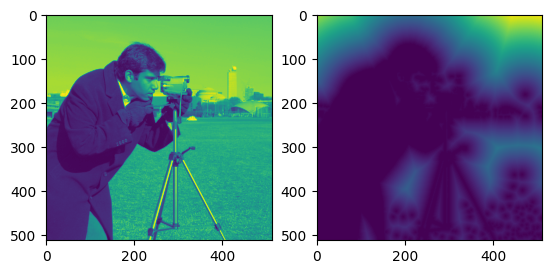

Betti numbers:  [22963, 13716, 0]
Betti numbers:  [13563, 23286, 0]
elapsed_time:0.8437480926513672 sec


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) uint8 37--255


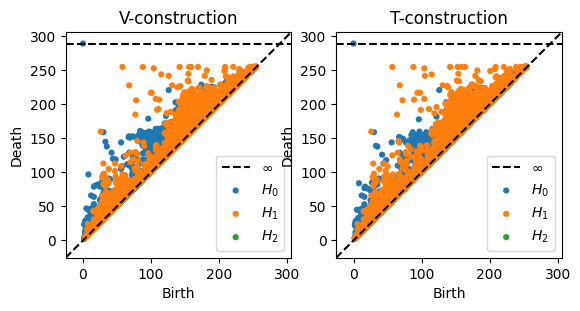

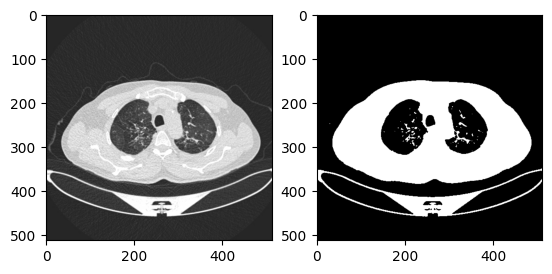

Betti numbers:  [17959, 11585, 0]
Betti numbers:  [12199, 17317, 0]
elapsed_time:5.756109952926636 sec
(512, 512) uint8 0--255


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]


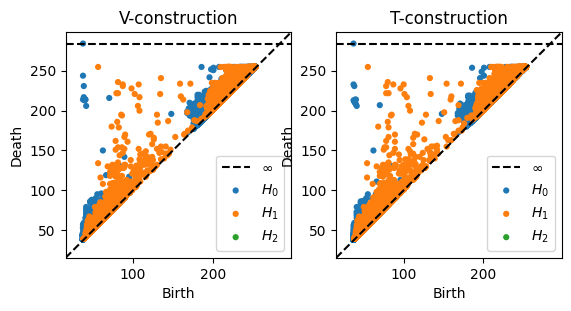

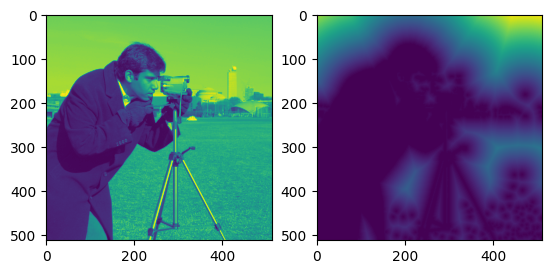

Betti numbers:  [22963, 13716, 0]
Betti numbers:  [13563, 23286, 0]
elapsed_time:0.4713399410247803 sec
(512, 512) uint8 0--255


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]


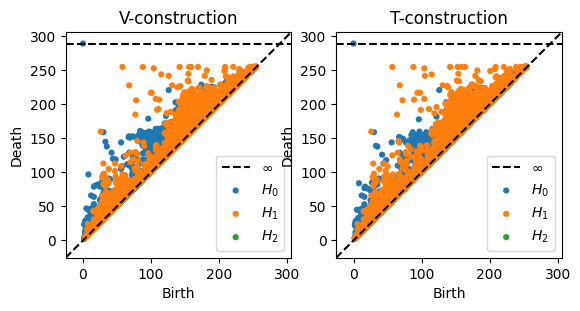

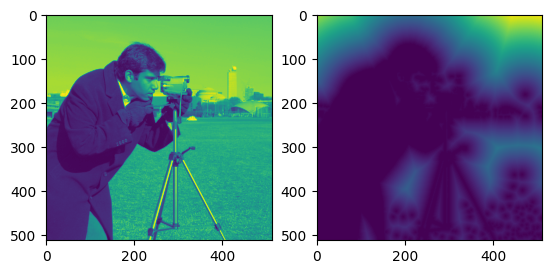

Betti numbers:  [22963, 13716, 0]
Betti numbers:  [13563, 23286, 0]
elapsed_time:0.40512633323669434 sec


c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\visuals.py:87: RuntimeWarning: overflow encountered in cast
  diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]
C:\Users\Aneesh PB\AppData\Local\Temp\ipykernel_15224\3183072297.py:9: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (512, 512, 3) looks like that of an RGB image.
  bw_img = (img >= threshold_otsu(img))


KeyboardInterrupt: 

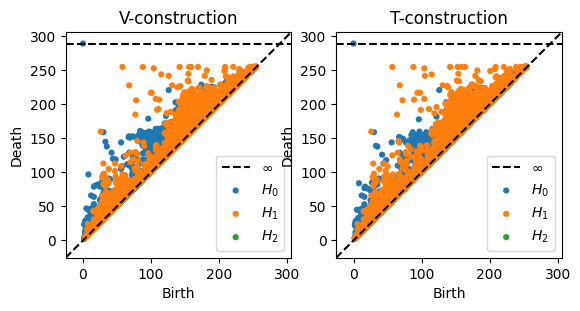

In [17]:

if __name__ == "__main__":
    # Provide the path to the input DICOM folder and the output PNG folder
    input_folder = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\Training image 20\\Normal cases"

    for imgfile in sorted(os.listdir(input_folder), key=numericalSort):
    #for imgfile in os.listdir(input_folder):
        #imgfile = '/content/drive/MyDrive/project/png/1-001.png'
        # load image data
        #print(imgfile)
        imgfile = os.path.join(input_folder, imgfile)
        if os.path.isfile(imgfile):
            #print(imgfile)
            img2d = np.array(Image.open(imgfile))
        else: # if file is not found, load the demo img from skimage
            img2d = skimage.data.camera()
            io.imsave(imgfile, img2d)

        # apply distance transform
        img2d_dt = dt(img2d)

        fig,axs = plt.subplots(1,2)
        axs[0].imshow(img2d)
        axs[1].imshow(img2d_dt)
        print(img2d.shape, img2d.dtype, f"{np.min(img2d)}--{np.max(img2d)}")
        plt.show()
        #print(f"Conversion completed for {imgfile}")
        start = time.time()
        pd = cr.computePH(img2d)
        pds = [pd[pd[:,0] == i] for i in range(3)]
        print("Betti numbers: ",[len(pds[i]) for i in range(len(pds))])

        # compute PH for the T-construction of the original image (pixel value filtration)
        pdt = tcr.computePH(img2d)
        pdst = [pdt[pdt[:,0] == i] for i in range(3)]
        print("Betti numbers: ",[len(pdst[i]) for i in range(len(pdst))])

        print ("elapsed_time:{} sec".format(time.time() - start))
       # print(pds)
        ## plot persistent diagram using persim
        fig,axs = plt.subplots(1,2)
        persim.plot_diagrams([p[:,1:3] for p in pds], ax=axs[0], title='V-construction')
        persim.plot_diagrams([p[:,1:3] for p in pdst], ax=axs[1], title='T-construction')

    print(f"All conversions completed")